## Observations and Insights

1. The mice weight and tumor volume are very closely correlated due to the weight being dependent on the volume of the tumor.
2. Ramicane and Capomulin were the 2 best regimens that had the smallest median for final tumor volume. Also the only regimens in the top four regimens with lower outliers.
3. Ramicane and Capomulin also were the two regimens with the most mice tested on. Because of this larger tet group it gabe us a better sense of the normal distributions.


## Dependencies and starter code

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [3]:
# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen
grouped_df = merged_df.groupby(["Drug Regimen"])
mean_df = grouped_df["Tumor Volume (mm3)"].mean()

In [5]:
median_df = grouped_df["Tumor Volume (mm3)"].median()

In [6]:
variance_df = grouped_df["Tumor Volume (mm3)"].var()

In [7]:
std_df = grouped_df["Tumor Volume (mm3)"].std()

In [8]:
sem_df = grouped_df["Tumor Volume (mm3)"].sem()

In [9]:
#Create the summary table for all the values by regimen
summary_table = pd.DataFrame({"Mean":mean_df,
                              "Median": median_df,
                              "Variance": variance_df, 
                              "Standard Deviation":std_df,
                             "SEM":sem_df})
summary_table = summary_table.sort_values(by='Median', ascending=True)
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

[Text(0, 0.5, 'Number of Regimens'),
 Text(0.5, 0, 'Drug Regimen'),
 Text(0.5, 1.0, 'Drug Regimen Data Points')]

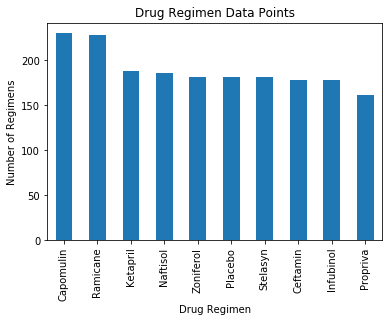

In [112]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Create a count table to use with the bar charts
counted_df = merged_df[["Drug Regimen","Sex"]]
counted_df = counted_df["Drug Regimen"].value_counts()
counted_df.rename(columns = {'Sex':'Count'}, inplace = True) 

fig, ax = plt.subplots()
counted_df.plot.bar(ax=ax)
ax.set(title="Drug Regimen Data Points",
      xlabel="Drug Regimen",


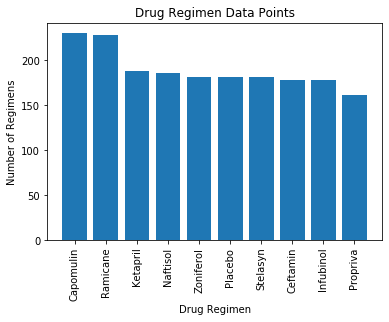

In [120]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

tick_locations = [value for value in counted_df.index]
plt.bar(counted_df.index, counted_df, alpha=1, align="center")
plt.xticks(tick_locations, counted_df.index, rotation="vertical")
plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Regimens")
plt.show()

## Pie plots

[Text(0, 0.5, 'Sex of Mice'), Text(0.5, 1.0, 'Distribution of Sex')]

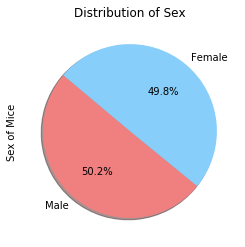

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create a DataFrame to count the sex of the mice
sex_counts = mouse_metadata["Sex"].value_counts()
colors = ["lightcoral", "lightskyblue"]
fig, ax = plt.subplots()
sex_counts.plot.pie(subplots=True, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, legend=False,
           ax=ax)
ax.set(title="Distribution of Sex",
      ylabel="Sex of Mice")

Text(0, 0.5, 'Sex of Mice')

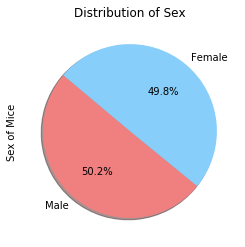

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, colors=colors, labels=sex_counts.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Sex")
plt.ylabel("Sex of Mice")


## Quartiles, outliers and boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
top4 = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
top4_df = merged_df.copy()
top4_df = top4_df.set_index('Drug Regimen')
top4_df = top4_df.loc[top4]


In [99]:
variables_ramicane = top4_df.loc["Ramicane"]["Tumor Volume (mm3)"]
variables_capomulin = top4_df.loc["Capomulin"]["Tumor Volume (mm3)"]
variables_infubinol = top4_df.loc["Infubinol"]["Tumor Volume (mm3)"]
variables_ceftamin = top4_df.loc["Ceftamin"]["Tumor Volume (mm3)"]

In [138]:
variables = [variables_ramicane, variables_capomulin,variables_infubinol,variables_ceftamin]
labels=["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]
#break out by each 4 regimens
for variable in variables:
    #volumes = variable["Tumor Volume (mm3)"]
    volumes = variable
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of the {variable.index[0]} volumes is: {lowerq}")
    print(f"The upper quartile of the {variable.index[0]} volumes is: {upperq}")
    print(f"The interquartile range of the {variable.index[0]} volumes is: {iqr}")
    print(f"The the median of the {variable.index[0]}volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} in the {variable.index[0]} could be outliers.")
    print(f"Values above {upper_bound} in the {variable.index[0]} could be outliers.")
    print("--------------------------------------------------------------")

The lower quartile of the Ramicane volumes is: 36.67463458499999
The upper quartile of the Ramicane volumes is: 45.0
The interquartile range of the Ramicane volumes is: 8.325365415000007
The the median of the Ramicanevolumes is: 40.67323554 
Values below 24.18658646249998 in the Ramicane could be outliers.
Values above 57.48804812250001 in the Ramicane could be outliers.
--------------------------------------------------------------
The lower quartile of the Capomulin volumes is: 37.685932865
The upper quartile of the Capomulin volumes is: 45.0
The interquartile range of the Capomulin volumes is: 7.314067135000002
The the median of the Capomulinvolumes is: 41.557808879999996 
Values below 26.714832162499995 in the Capomulin could be outliers.
Values above 55.9711007025 in the Capomulin could be outliers.
--------------------------------------------------------------
The lower quartile of the Infubinol volumes is: 47.3123533
The upper quartile of the Infubinol volumes is: 57.31444396750

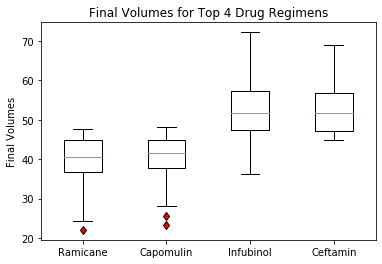

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four 
#treatment regimens and highlight any potential outliers in the plot by changing their color and style.
red_outlier = dict(markerfacecolor='r', marker='d')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Volumes for Top 4 Drug Regimens')
ax1.set_ylabel('Final Volumes')
ax1.boxplot(variables, labels=labels, flierprops=red_outlier)
plt.show()



## Line and scatter plots

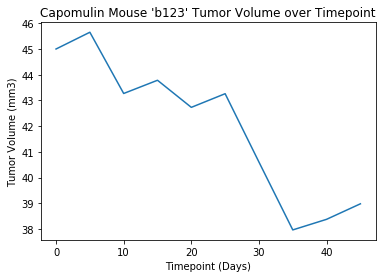

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

#Filter the df down to the Capomulin Drug Regimen, pulling in only the volume and timepoints
capomulin = merged_df.copy()
capomulin = capomulin.set_index('Drug Regimen')
capomulin = capomulin.loc['Capomulin']
capomulin = capomulin.set_index("Mouse ID")
capomulin = capomulin.loc['b128']
volume_timepoint = capomulin[["Tumor Volume (mm3)", "Timepoint"]]


#Graph the line graph with the time as the X values and Volume as the Y values.
x_value = volume_timepoint
plt.plot(volume_timepoint["Timepoint"],volume_timepoint["Tumor Volume (mm3)"])
plt.title("Capomulin Mouse 'b123' Tumor Volume over Timepoint")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
ave_volume = capomulin.groupby(["Mouse ID"]).mean()
ave_volume = ave_volume[["Tumor Volume (mm3)", "Weight (g)" ]]

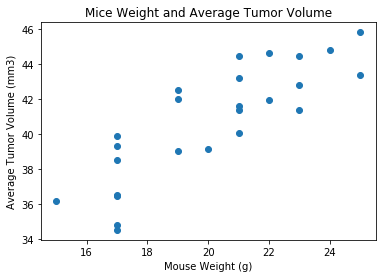

In [144]:
plt.scatter(ave_volume["Weight (g)"],ave_volume["Tumor Volume (mm3)"])
plt.title("Mice Weight and Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

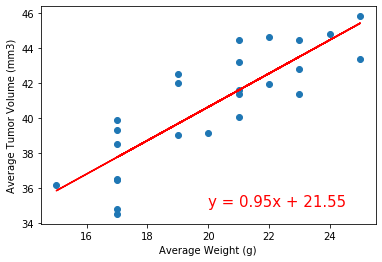

The r-squared is: 0.8419363424694718


In [145]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
#volume for the Capomulin regimen

# Filter the data down to the Capomulin regimen, pulling in just the weigh and volume.
y_values = ave_volume["Tumor Volume (mm3)"]
x_values = ave_volume["Weight (g)"]

#Create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.show()
print(f"The r-squared is: {rvalue}")
